#### Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the csv

In [27]:
df=pd.read_csv('Data/indian_liver_patient.csv')
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.shape

(583, 11)

#### Check for null values

In [5]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

#### Encoding our categorical variable

In [7]:
df = pd.get_dummies(df,drop_first=True)

In [24]:
df.head(20)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result,Gender
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,0,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,0,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,1,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,0,1


In [9]:
df.rename(columns={'Gender_Male':'Gender','Dataset':'Result'},inplace=True)

In [10]:
df['Result'].replace({1:0,2:1},inplace=True)

###### First split the data into X and y (independent and dependent variables)

In [11]:
X = df.drop('Result',axis=1)
y = df.Result

#### Check for imbalance

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


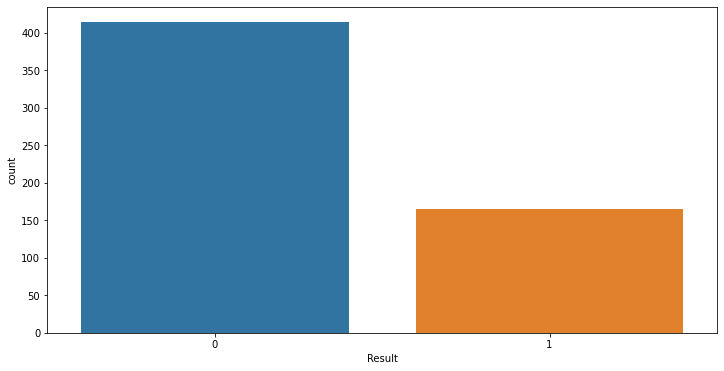

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot(y, label="Count")

##### Lets balance this data 

In [13]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(sampling_strategy='all')
X_sm,y_sm =sm.fit_resample(X,y)

In [14]:
from collections import Counter

print(Counter(y_sm))
print(Counter(y))

Counter({1: 243, 0: 191})
Counter({0: 414, 1: 165})


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

##### Lets visualize

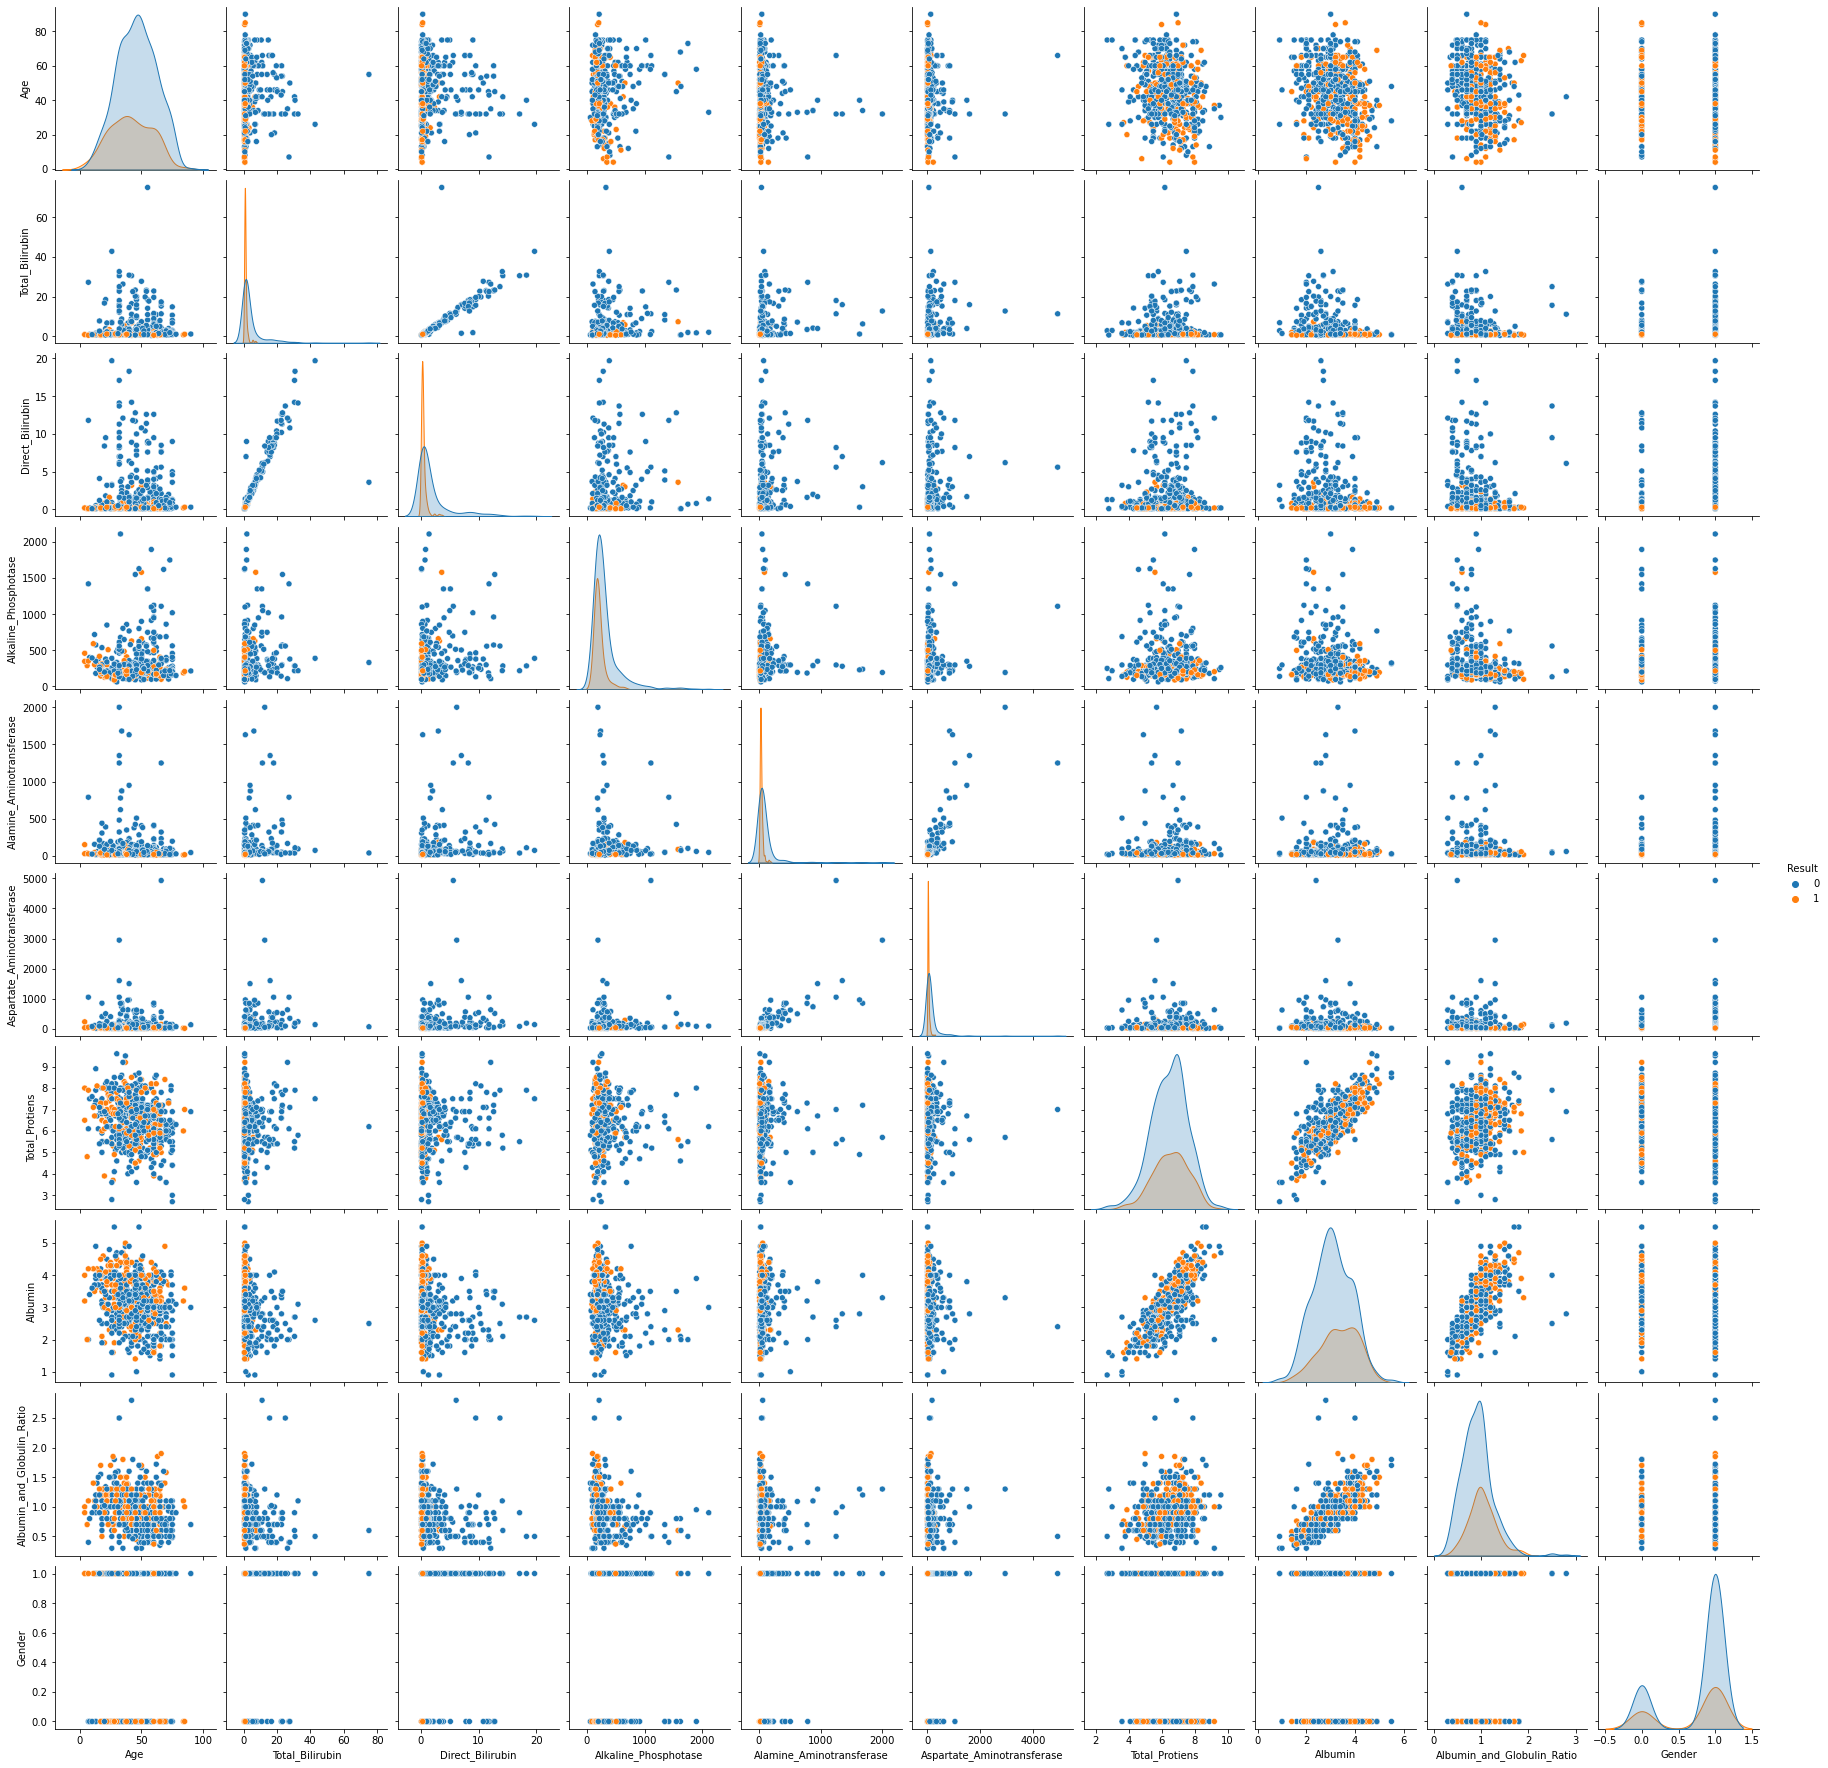

In [16]:
sns.pairplot(df,hue='Result',palette="tab10")

#### Check the correlations between variables

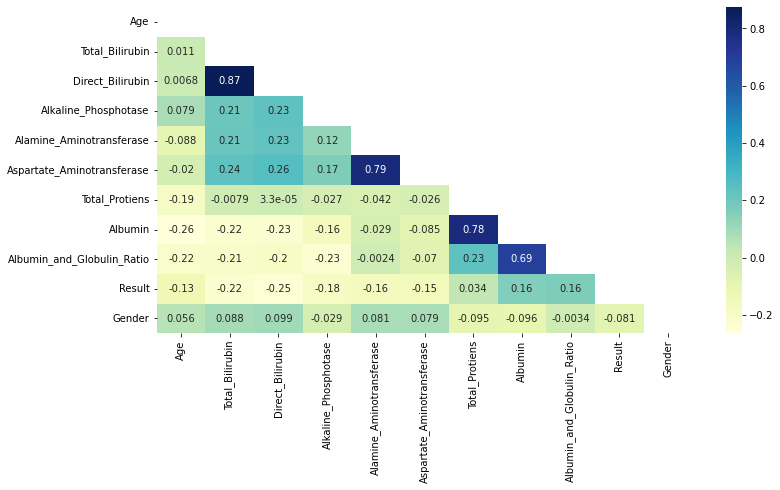

In [17]:
plt.figure(figsize=(12,6))
mask=np.triu(df.corr())

sns.heatmap(df.corr(),annot=True,mask=mask,cmap='YlGnBu')
plt.show()

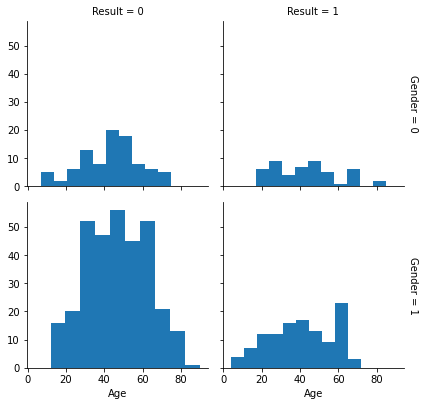

In [18]:
g = sns.FacetGrid(df, col="Result", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)

##### These variables do not show high multicollinearity

#### Model training

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
random_state = 42


model1 = DecisionTreeClassifier(random_state=random_state)
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=random_state))
model3 = RandomForestClassifier(n_estimators=50,random_state=random_state)
model4 = GradientBoostingClassifier(random_state=random_state)
model5 = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000)
model6 = XGBClassifier(random_state = random_state)
model7 = SVC(random_state=random_state)
model8 = KNeighborsClassifier()
model9 = GaussianNB()



def make_classification(X_train, X_test, y_train, y_test):
    accuracy, f1,crossvalscore = [], [],[]

    

    ##classifiers
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)
    classifiers.append(model5)
    classifiers.append(model6)
    classifiers.append(model7)
    classifiers.append(model8)
    classifiers.append(model9)

    for classifier in classifiers:
        # classifier and fitting
        clf = classifier
        clf.fit(X_train, y_train)

        # predictions
        y_preds = clf.predict(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)
        crossvalscore.append(np.mean(cross_val_score(clf,X_sm,y_sm,cv=5)))
        

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               'Cross_val_score':crossvalscore,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting",
                                             "Logistic reg",'XGB',
                                             "SVC", "KNN","GNB"]})

    results = (results_df.sort_values(by=['Cross_val_score'], ascending=False)
               .reset_index(drop=True))

    return classifiers, results


classifiers, results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,Cross_val_score,ML Models
0,95.419847,95.774648,0.940176,RandomForest
1,95.419847,95.774648,0.940176,XGB
2,94.656489,95.104895,0.935579,AdaBoost
3,95.419847,95.774648,0.935552,GradientBoosting
4,90.839695,91.666667,0.907859,KNN
5,93.129771,93.793103,0.884897,DecisionTree
6,90.839695,91.891892,0.882678,Logistic reg
7,82.442748,85.161290,0.834189,GNB
8,80.152672,83.544304,0.820449,SVC


#### Lets see the classification report  

In [22]:
y_pred3 = model3.predict(X_test)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import classification_report
print('Report for Random Forest:')
print(classification_report(y_test,y_pred3))
print('Report for XGB:')
print(classification_report(y_test,y_pred6))



Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        63
           1       0.92      1.00      0.96        68

    accuracy                           0.95       131
   macro avg       0.96      0.95      0.95       131
weighted avg       0.96      0.95      0.95       131

Report for XGB:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        63
           1       0.92      1.00      0.96        68

    accuracy                           0.95       131
   macro avg       0.96      0.95      0.95       131
weighted avg       0.96      0.95      0.95       131



#### Lets test the models 

#### First Result = 1

In [29]:
data= np.array([[33,1.6,0.5,165,15,23,7.3,3.5,0.92,1]])
prediction1 = model3.predict(data)
prediction2 = model6.predict(data)
print(prediction1)
print(prediction2)

[1]
[1]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Now Result = 0

In [28]:
data= np.array([[64,0.9,0.3,310,61,58,7.0,3.4,0.90,1]])
prediction1 = model3.predict(data)
prediction2 = model6.predict(data)
print(prediction1)
print(prediction2)

[0]
[0]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
data= np.array([[40,0.9,0.3,293,232,245,6.8,3.1,0.80,0]])
prediction1 = model3.predict(data)
prediction2 = model6.predict(data)
print(prediction1)
print(prediction2)

[0]
[0]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import pickle

pickle.dump(model6, open('liverdiseaseXGB.pkl','wb'))       